# Exercício 1
A representação de uma determinada mensagem digital ternária, isto é formada por três bits,
forma um cubo cujos vértices correspondem a mesma representação digital. Supondo que ao
transmitirmos esta mensagem a mesma possa ser contaminada por ruído formado em torno de
cada vértice uma nuvem esférica de valores aleatórios com raio máximo é 0.1. Formule este
problema como um problema de classificação de padrões e treine uma rede de Perceptron de
Rosenblatt (Perceptron de camada única) para atuar como classificador/decodificador. Para
solução do problema defina antes um conjunto de treinamento e um conjunto de validação.

Dica: O problema pode ser formulado como um problema de classificação de 8 padrões
diferentes, sendo que cada padrão representa um vértice do cubo.

Padrão 1: x = {0,0,0} com vetor resposta d = {​ 1.0​ , -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0}

Padrão 2: x = {0,0,1} com vetor resposta d = {-1.0, ​ 1.0​ , -1.0, -1.0, -1.0, -1.0, -1.0, -1.0}

Padrão 3: x = {0,1,0} com vetor resposta d = {-1.0, -1.0, ​ 1.0​ , -1.0, -1.0, -1.0, -1.0, -1.0}

Padrão 4: x = {0,1,1} com vetor resposta d = {-1.0, -1.0, -1.0, ​ 1.0​ , -1.0, -1.0, -1.0, -1.0}

Padrão 5: x = {1,0,0} com vetor resposta d = {-1.0, -1.0, -1.0, -1.0, ​ 1.0​ , -1.0, -1.0, -1.0}

Padrão 6: x = {1,0,1} com vetor resposta d = {-1.0, -1.0, -1.0, -1.0, -1.0, ​ 1.0​ , -1.0, -1.0}

Padrão 7: x = {1,1,0} com vetor resposta d = {-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, ​ 1.0​ , -1.0}

Padrão 8: x = {1,1,1} com vetor resposta d = {-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, ​ 1.0​ }


## Geração de dados
Nesta etapa serão geradas 1000 instâncias:<br />
500 para treino<br />
250 para validação<br />
250 para teste

A função one_hot_encode convert um array de inteiros em um array de arrays.

In [1]:
import random
import numpy as np

def one_hot_encode(x):
    one_hot = np.zeros([len(x), 8])
    for i in enumerate(x):
        one_hot[(i[0], i[1])] = 1
    return one_hot

def rand():
    return round(random.randint(0,1) + random.uniform(-0.1, 0.1),4)

total_data = 1000
data_X = np.zeros((total_data,3), dtype=np.float32)
data_y = np.zeros(total_data, dtype=np.int8)

for i in range(total_data):
    val = np.array([rand(), rand(), rand()])
    data_X[i] = val

    code = np.array([round(val[0]), round(val[1]), round(val[2])])
    label = np.array([code[0]*4 + code[1]*2 + code[2]])
    data_y[i] = label

data_y = one_hot_encode(data_y)

train_X, val_X = np.split(data_X, 2)
train_y, val_y = np.split(data_y, 2)

val_X, test_X = np.split(val_X, 2)
val_y, test_y = np.split(val_y, 2)

### Demonstração da geração de dados
Amostras aleatórias.

In [2]:
print('{0} => {1}'.format(train_X[5], train_y[5]))
print('{0} => {1}'.format(train_X[15], train_y[15]))
print('{0} => {1}'.format(train_X[35], train_y[35]))

[ 0.9871  0.0026 -0.028 ] => [0. 0. 0. 0. 1. 0. 0. 0.]
[0.0452 1.0683 0.9686] => [0. 0. 0. 1. 0. 0. 0. 0.]
[ 1.0653 -0.022  -0.0833] => [0. 0. 0. 0. 1. 0. 0. 0.]


## Rede Neural

Training the model...
Epoch 0 | Batch 0 | Train Loss: 122.79246 | Validation Loss: 61.052116
Epoch 1 | Batch 0 | Train Loss: 97.16364 | Validation Loss: 48.877502
Epoch 2 | Batch 0 | Train Loss: 76.18881 | Validation Loss: 38.902603
Epoch 3 | Batch 0 | Train Loss: 68.01 | Validation Loss: 35.350937
Epoch 4 | Batch 0 | Train Loss: 59.321373 | Validation Loss: 30.334305
Epoch 5 | Batch 0 | Train Loss: 51.530205 | Validation Loss: 25.92707
Epoch 6 | Batch 0 | Train Loss: 44.620472 | Validation Loss: 22.53959
Epoch 7 | Batch 0 | Train Loss: 38.53381 | Validation Loss: 19.509848
Epoch 8 | Batch 0 | Train Loss: 32.992744 | Validation Loss: 16.555058
Epoch 9 | Batch 0 | Train Loss: 28.276533 | Validation Loss: 14.10494
Epoch 10 | Batch 0 | Train Loss: 23.923254 | Validation Loss: 11.974051
Epoch 11 | Batch 0 | Train Loss: 20.094147 | Validation Loss: 10.109481
Epoch 12 | Batch 0 | Train Loss: 16.811155 | Validation Loss: 8.4513
Epoch 13 | Batch 0 | Train Loss: 14.051729 | Validation Loss: 7.0

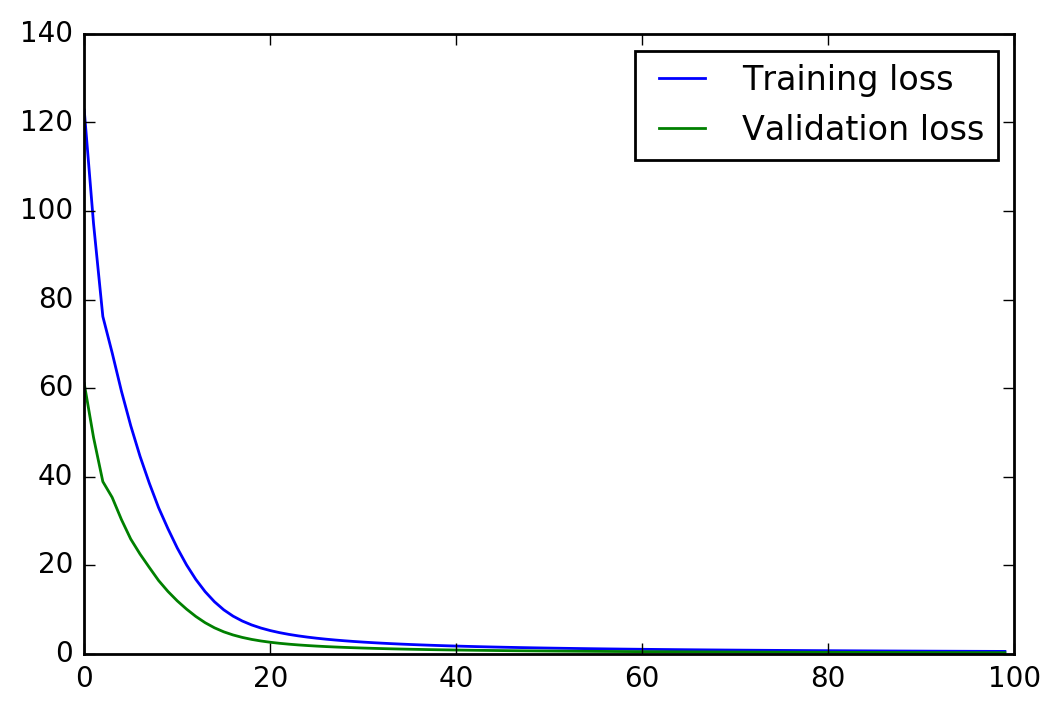

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

tf.reset_default_graph()

learning_rate = 0.01
epoch = 100
interval = 10
batch_size = train_X.shape[0] # Questão 2-B
n_batches = train_X.shape[0]//batch_size

# Layer's sizes
x_size = train_X.shape[1]   # Number of input nodes: 3 features and 1 bias
h_size = 12                 # Number of hidden nodes
y_size = train_y.shape[1]   # Number of outcomes (8 classes)

# Symbols
X = tf.placeholder(tf.float32, shape=[None, x_size], name='X')
y = tf.placeholder(tf.float32, shape=[None, y_size], name='y')

# Weight initializations
w1 = tf.Variable(tf.random_normal(shape=(x_size, h_size)))
b1 = tf.Variable(tf.random_normal(shape=[h_size]))
w2 = tf.Variable(tf.random_normal(shape=(h_size, y_size)))
b2 = tf.Variable(tf.random_normal(shape=[y_size]))

# Operations
hidden_output = tf.nn.relu(tf.add(tf.matmul(X, w1), b1))
final_output = tf.nn.softmax(tf.add(tf.matmul(hidden_output, w2), b2), name='final_output')

# Cost Function
loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(final_output), axis=0))

# Optimizer
# Gradient Descent (GD)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Questão 2-C: Momentum GD
optimizer = tf.train.MomentumOptimizer(learning_rate, 0.5).minimize(loss)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Run SGD
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Training
print('Training the model...')
losses = {'train':[], 'validation':[]}

for e in range(epoch):
    idxs = np.random.permutation(train_X.shape[0]) #shuffled ordering
    random_X = train_X[idxs]
    random_y = train_y[idxs]
    for i in range(n_batches):
        batch_X = random_X[i * batch_size:(i+1) * batch_size]
        batch_y = random_y[i * batch_size:(i+1) * batch_size]
        sess.run(optimizer,feed_dict = {X: batch_X, y:batch_y})
        
        if i % interval == 0:
            train_loss = sess.run(loss, feed_dict={X: train_X, y: train_y})
            val_loss   = sess.run(loss, feed_dict={X: val_X, y: val_y})
            print('Epoch', e, '|',
                  'Batch', i, '|',
                  'Train Loss:', train_loss , '|',
                  'Validation Loss:', val_loss)
            losses['train'].append(train_loss)
            losses['validation'].append(val_loss)

save_path = saver.save(sess, './my_test_model',global_step=1000)
print("Model saved in path: %s" % save_path)
sess.close()

plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

## Testando a Rede

In [16]:
# Import model
with tf.Session() as sess:    
    saver = tf.train.import_meta_graph('./my_test_model-1000.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    
    graph = tf.get_default_graph()
    X = graph.get_tensor_by_name("X:0")
    final_output = graph.get_tensor_by_name("final_output:0")
    
    success = 0
    for i in range(len(test_X)):
        predicted = sess.run(final_output, feed_dict={X: [test_X[i]]})
        if np.argmax(test_y[i]) == np.argmax(predicted):
            success += 1
        print('Actual:', test_y[i], 'Predicted:', np.rint(predicted))
    
    print('Accuracy:', success/len(test_X))
    

INFO:tensorflow:Restoring parameters from ./my_test_model-1000
Actual: [0. 0. 0. 0. 0. 1. 0. 0.] Predicted: [[0. 0. 0. 0. 0. 1. 0. 0.]]
Actual: [0. 0. 0. 0. 1. 0. 0. 0.] Predicted: [[0. 0. 0. 0. 1. 0. 0. 0.]]
Actual: [0. 0. 0. 0. 0. 1. 0. 0.] Predicted: [[0. 0. 0. 0. 0. 1. 0. 0.]]
Actual: [1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Actual: [0. 0. 0. 0. 0. 0. 0. 1.] Predicted: [[0. 0. 0. 0. 0. 0. 0. 1.]]
Actual: [0. 0. 0. 1. 0. 0. 0. 0.] Predicted: [[0. 0. 0. 1. 0. 0. 0. 0.]]
Actual: [1. 0. 0. 0. 0. 0. 0. 0.] Predicted: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Actual: [0. 0. 0. 0. 1. 0. 0. 0.] Predicted: [[0. 0. 0. 0. 1. 0. 0. 0.]]
Actual: [0. 0. 1. 0. 0. 0. 0. 0.] Predicted: [[0. 0. 1. 0. 0. 0. 0. 0.]]
Actual: [0. 1. 0. 0. 0. 0. 0. 0.] Predicted: [[0. 1. 0. 0. 0. 0. 0. 0.]]
Actual: [0. 0. 0. 0. 0. 0. 0. 1.] Predicted: [[0. 0. 0. 0. 0. 0. 0. 1.]]
Actual: [0. 1. 0. 0. 0. 0. 0. 0.] Predicted: [[0. 1. 0. 0. 0. 0. 0. 0.]]
Actual: [0. 1. 0. 0. 0. 0. 0. 0.] Predicted: [[0. 1. 0. 0. 0.